In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

T [1] = 150.00
T [2] = 150.00
T [3] = 150.00
T [4] = 150.00
T [5] = 150.00
T [6] = 150.00
T [7] = 150.00
T [8] = 150.00
T [9] = 150.00
T [10] = 150.00
T [11] = 150.00
T [12] = 150.00
T [13] = 150.00
T [14] = 150.00
T [15] = 150.00
T [16] = 150.00
T [17] = 150.00
T [18] = 150.00
T [19] = 150.00
T [20] = 150.00
T [21] = 150.00
T [22] = 150.00
T [23] = 150.00
T [24] = 150.00
T [25] = 150.00
T [26] = 149.99
T [27] = 149.93
T [28] = 149.57
T [29] = 147.33
T [30] = 133.20
T [31] = 44.40
T [32] = 0.00

T [1] = 150.00
T [2] = 150.00
T [3] = 150.00
T [4] = 150.00
T [5] = 150.00
T [6] = 150.00
T [7] = 150.00
T [8] = 150.00
T [9] = 150.00
T [10] = 150.00
T [11] = 150.00
T [12] = 150.00
T [13] = 150.00
T [14] = 150.00
T [15] = 150.00
T [16] = 150.00
T [17] = 150.00
T [18] = 150.00
T [19] = 150.00
T [20] = 150.00
T [21] = 150.00
T [22] = 150.00
T [23] = 150.00
T [24] = 150.00
T [25] = 149.99
T [26] = 149.95
T [27] = 149.73
T [28] = 148.63
T [29] = 143.34
T [30] = 120.33
T [31] = 40.11
T [32] = 0.00

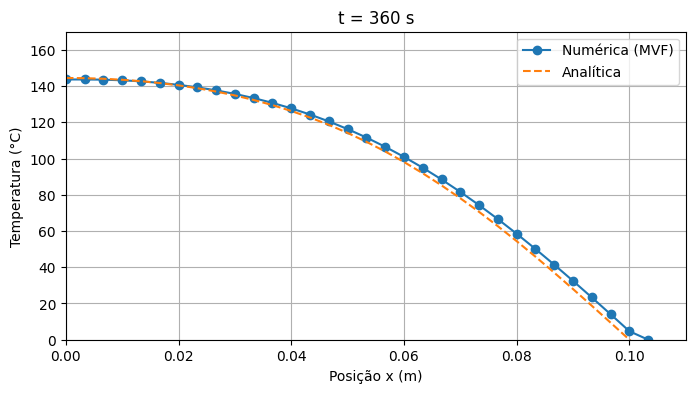

In [ ]:
# Definições do problema
k = 25               # W/mK
rho_cp = 10e6        # J/m^3.K
lenght = 0.1         # m
T_init = 150         # graus Celsius
time = 360           # s
nodes = 30
alpha = k / rho_cp   # Difusividade

# Iniciação
dx = lenght / nodes 
dt = 1  # s

# Vetores de temperatura
T0 = [0] * (nodes+3)
T  = [0] * (nodes+3)
P  = [0] * (nodes+3)
Q  = [0] * (nodes+3)

# Condição inicial
for i in range(nodes+2):
    T0[i] = T_init
T0[nodes+2] = 0  # Condição de Dirichlet na fronteira direita

# Vetor de posições
x = [(i-1)*dx for i in range(1, nodes+3)]

# Solução analítica
def sol_analitica(x,t):
    soma = 0.0
    for m in range(0, 100):
        lambdda = ((2*m - 1) * np.pi) / (2 * lenght)
        soma += (((-1)**(m+1)) / (2*m-1)) * np.exp(-alpha * lambdda**2 * t) * np.cos(lambdda * x)
    return T_init * (4/np.pi) * soma

# Plot
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim(0, lenght + 0.01)
ax.set_ylim(0, T_init + 20)
ax.set_xlabel("Posição x (m)")
ax.set_ylabel("Temperatura (°C)")
ax.grid(True)

linha_num = ax.plot([], [], 'o-', label="Numérica (MVF)")[0]
linha_ana = ax.plot([], [], '--', label="Analítica")[0]
ax.legend()

def atualizar(frame):
    global T0, T, P, Q

    # Solução analítica para o tempo atual
    T_ana = [sol_analitica(x[i], frame*dt) for i in range(len(x))]

    if frame == 0:
        linha_num.set_data(x, [T0[i] for i in range(1, nodes+3)])
        linha_ana.set_data(x, T_ana)
        return linha_num, linha_ana

    # Coeficientes do método numérico
    a = k / dx
    a_p0 = (rho_cp * dx) / dt
    a_p = (2*a) + a_p0

    # Nó 2
    a1 = k / (dx/2)
    S_ca2 = (a1 * T0[1]) / dx
    S_pa2 = -a1 / dx
    a_2 = a - (S_pa2 * dx)
    b_2 = S_ca2 * dx

    # Nó 31
    S_ca31 = a1 * T0[nodes+2] / dx
    S_pa31 = -a1 / dx
    a_31 = a - S_pa31 * dx
    b_31 = S_ca31 * dx

    # TDMA
    P[2] = a/a_2
    Q[2] = b_2/a_2

    for i in range(3, nodes+1):
        P[i] = a / (a_p - a * P[i-1])
        Q[i] = (a_p0*T0[i] + a * Q[i-1]) / (a_p - a * P[i-1])

    Q[nodes+1] = (b_31 + a * Q[nodes]) / (a_31 - a * P[nodes])
    T[nodes+1] = Q[nodes+1]

    for i in range(nodes, 0, -1):
        T[i] = P[i] * T[i+1] + Q[i]
    T[1] = T[2]

    for i in range (1, nodes+3):
        print("T", [i] ,"= " f"{T[i]:.2f}")

    print("")

    # Atualizar T0
    for i in range(1, nodes+2):
        T0[i] = T[i]

    # Atualizar gráficos
    linha_num.set_data(x, [T[i] for i in range(1, nodes+3)])
    linha_ana.set_data(x, T_ana)
    ax.set_title(f"t = {frame*dt} s")

    return linha_num, linha_ana

anim = animation.FuncAnimation(fig, atualizar, frames=time+1, interval=30, blit=True)
anim.save("diffusao.mp4", fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
